In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/kaggle/input/unemployment-by-age-groups-dataset/unemployment_rate_by_age_groups.csv")

In [6]:
df.head()

,Area Type,Area Name,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,State,California,2/1/2008,2008,February,0.184,0.093,0.053,0.040,0.041,0.039,0.048
1,State,California,3/1/2008,2008,March,0.187,0.096,0.054,0.041,0.042,0.038,0.050
2,State,California,4/1/2008,2008,April,0.187,0.097,0.055,0.043,0.043,0.037,0.050
3,State,California,5/1/2008,2008,May,0.187,0.101,0.057,0.044,0.045,0.036,0.050
4,State,California,6/1/2008,2008,June,0.191,0.105,0.059,0.044,0.046,0.038,0.048


In [7]:
df.describe()

,Year,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,2015.670103,0.231201,0.120237,0.075892,0.060727,0.058093,0.058887,0.061804
std,4.684273,0.078050,0.039872,0.026660,0.024138,0.024083,0.022614,0.023262
min,2008.000000,0.113000,0.069000,0.040000,0.028000,0.028000,0.030000,0.026000
25%,2012.000000,0.164750,0.081000,0.051000,0.040000,0.035000,0.038000,0.041250
50%,2016.000000,0.212500,0.113500,0.071000,0.053000,0.052500,0.054000,0.054500
75%,2020.000000,0.309000,0.155750,0.101000,0.081000,0.077000,0.081000,0.085000
max,2024.000000,0.361000,0.195000,0.120000,0.107000,0.106000,0.098000,0.111000


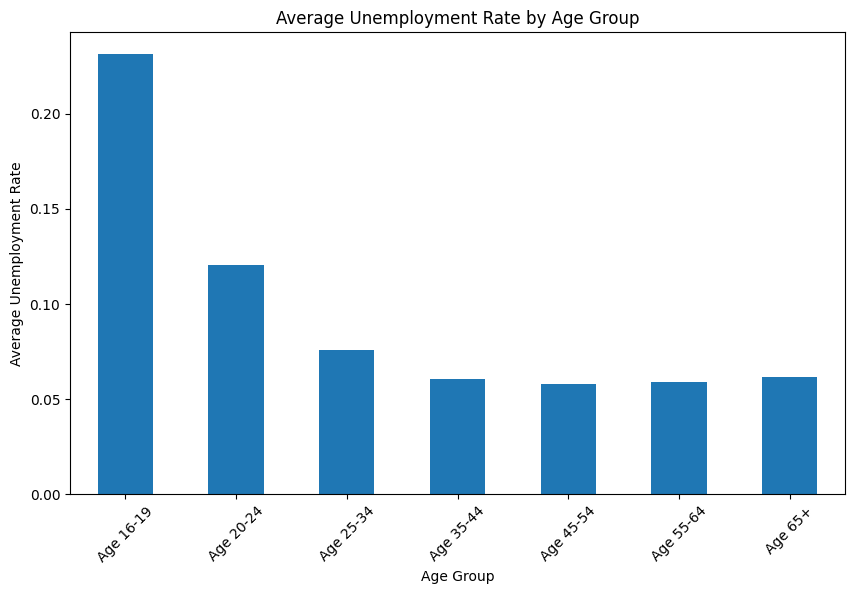

In [11]:
# Average Unemployment Rate
avg_unemployment = df.iloc[:, 5:].mean()
avg_unemployment.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Age Group')
plt.xticks(rotation=45)
plt.show()

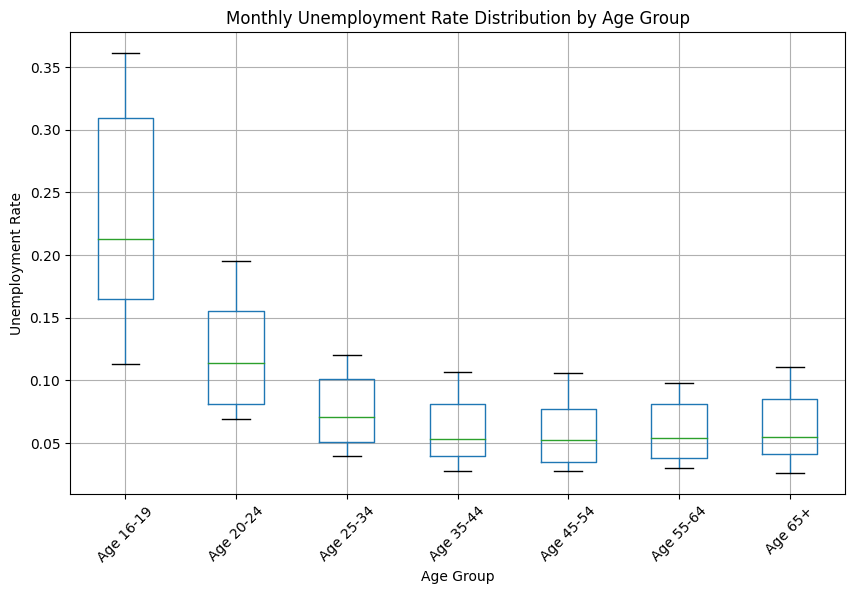

In [12]:
# Monthly Unemployment Rate Distribution
df.iloc[:, 5:].boxplot(figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Rate Distribution by Age Group')
plt.xticks(rotation=45)
plt.show()

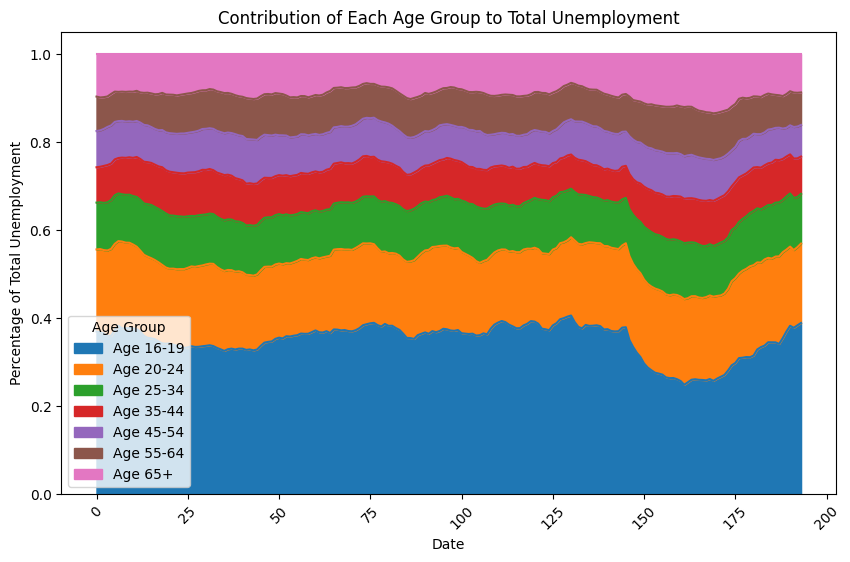

In [16]:
# Age Group Comparison as Percentage of Total Unemployment
total_unemployment = df.iloc[:, 5:].sum(axis=1)
age_group_contributions = df.iloc[:, 5:] / total_unemployment.values[:, None]
age_group_contributions.plot(kind='area', stacked=True, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Percentage of Total Unemployment')
plt.title('Contribution of Each Age Group to Total Unemployment')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.show()

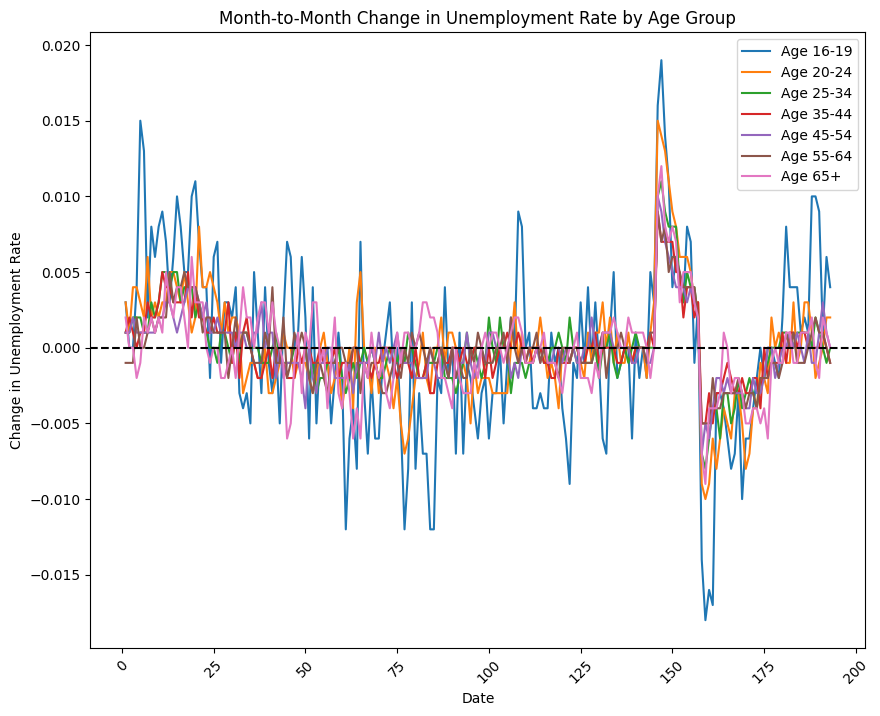

In [21]:
# Age Group Unemployment Rate Change
unemployment_change = df.iloc[:, 5:].diff()
unemployment_change.plot(figsize=(10, 8))
plt.xlabel('Date')
plt.ylabel('Change in Unemployment Rate')
plt.title('Month-to-Month Change in Unemployment Rate by Age Group')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

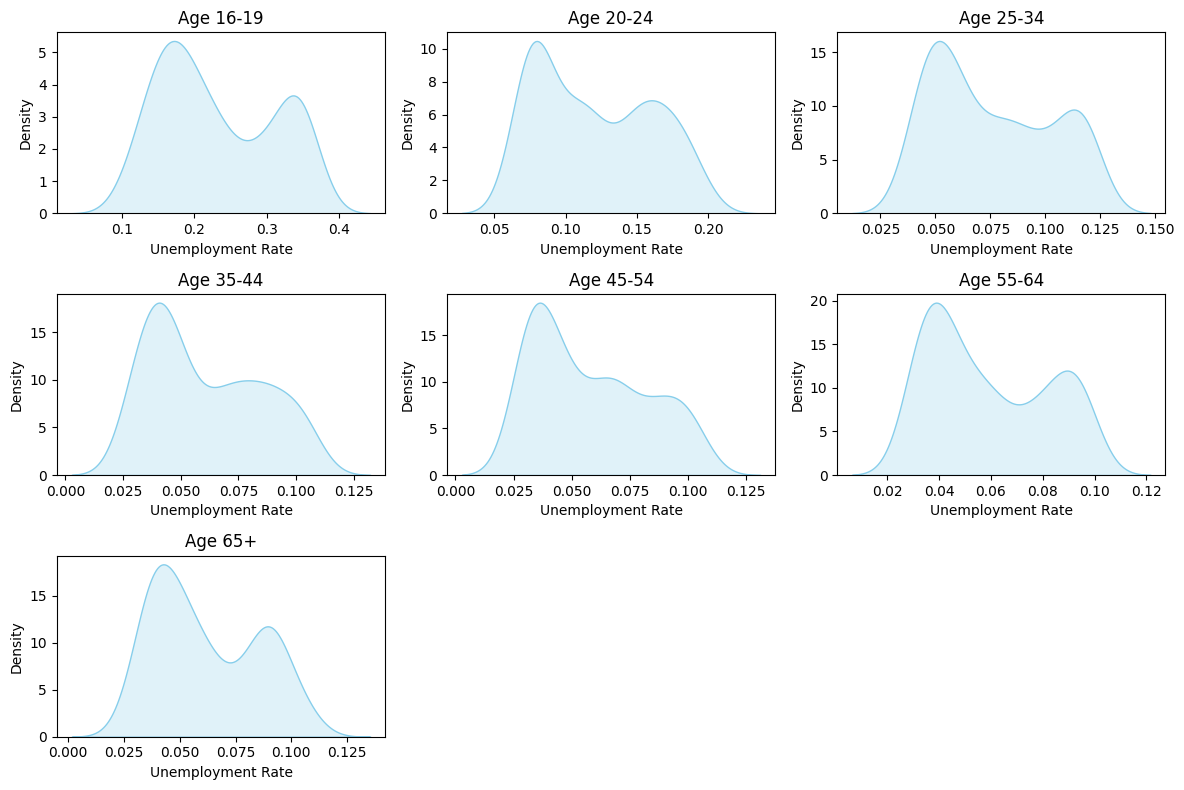

In [24]:
# Age Group Unemployment Rate Distribution KDE Plot
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[5:]):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(df[column], shade=True, color='skyblue')
    plt.title(column)
    plt.xlabel('Unemployment Rate')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

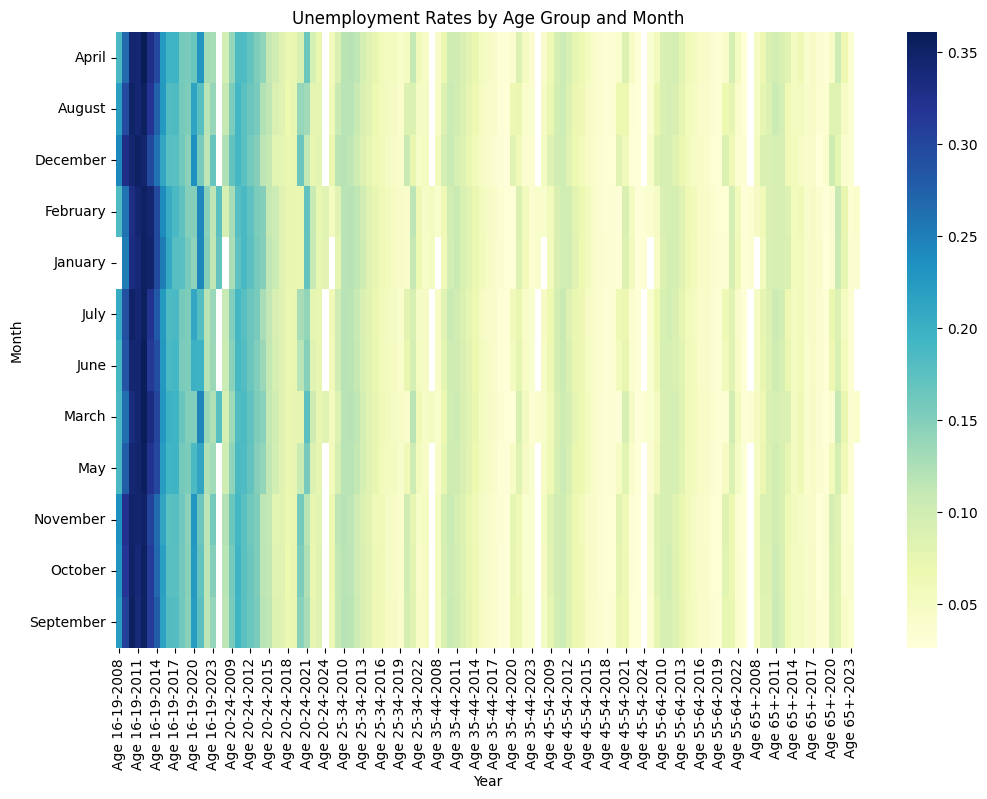

In [27]:
# Heatmap of Unemployment Rates by Age Group and Month
df_pivot = df.pivot_table(index='Month', columns='Year', values=df.columns[5:])
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='YlGnBu')
plt.title('Unemployment Rates by Age Group and Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

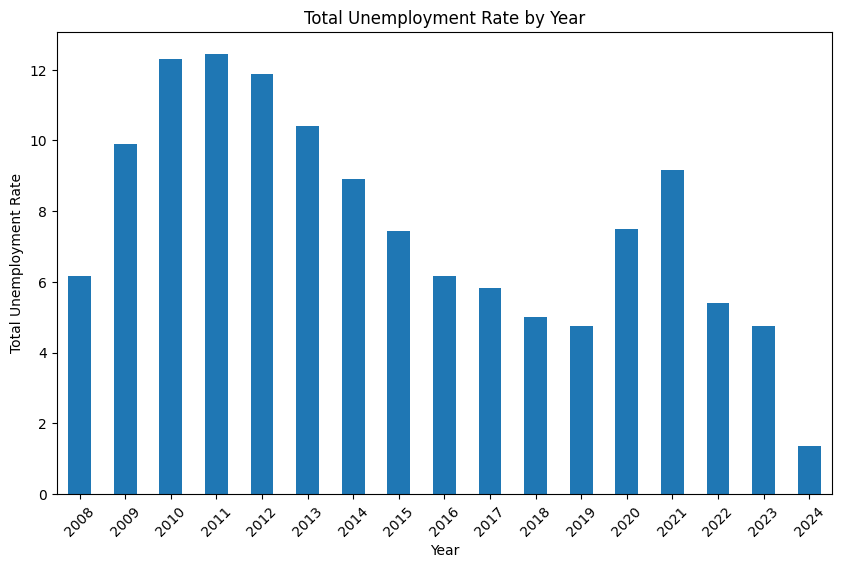

In [33]:
# Bar Plot of Total Unemployment Rate by Year
total_unemployment_yearly = df.groupby('Year')[df.columns[5:]].sum().sum(axis=1)
total_unemployment_yearly.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Unemployment Rate')
plt.title('Total Unemployment Rate by Year')
plt.xticks(rotation=45)
plt.show()

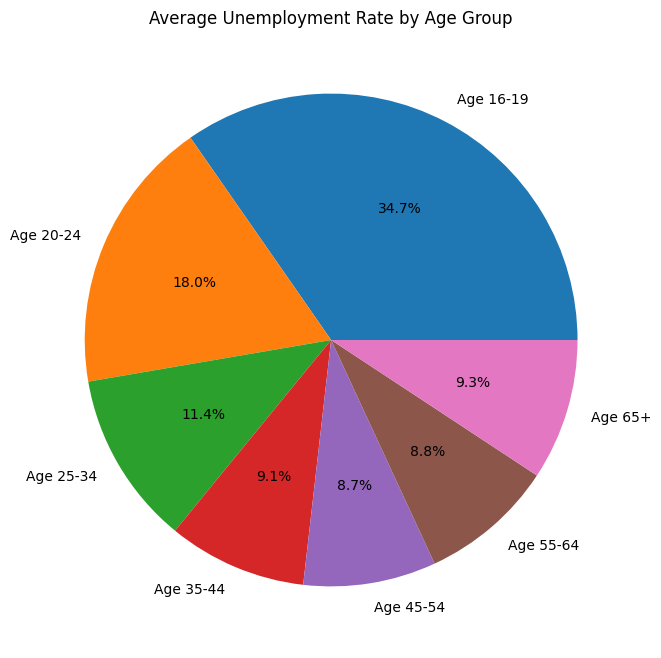

In [35]:
# Pie Chart of Average Unemployment Rate by Age Group
avg_unemployment.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Average Unemployment Rate by Age Group')
plt.ylabel('')
plt.show()